In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

In [2]:
#sample configuration, you can modify these parameters to launch a different simulation
sizeOfSample = 10 #total number of people in sample
infectionRate = 0.3 #probability of infecting one person a day, value range is [0,1)
timesOfSimulation = 10 #how many times of simulation

In [3]:
#all pandemic simulations are generated in this section
def createRandomSample(sizeOfSample, infectionRate):
    '''
    Purpose: generate a random sample of the infected people number per day.
    the sample index range is 0 ~ sample.length-1, 0 means the first day, n means the nth day,
    if sample[n] is 1, it means there is 1 person infected in the nth day, 
    otherwise, no person get infected that day.
    '''
    sample = []
    while True:
        infected = 1 if (random() < infectionRate) else 0
        sample.append(infected)
        if sample.count(1) >= sizeOfSample:
            break;
    return sample

samples = []
for i in range(timesOfSimulation):
    samples.append(createRandomSample(sizeOfSample, infectionRate))
    print(f"Simulation {i+1:3d}: Pandemic ends {len(samples[-1]):4d} days later")

Simulation   1: Pandemic ends   26 days later
Simulation   2: Pandemic ends   34 days later
Simulation   3: Pandemic ends   31 days later
Simulation   4: Pandemic ends   21 days later
Simulation   5: Pandemic ends   47 days later
Simulation   6: Pandemic ends   22 days later
Simulation   7: Pandemic ends   36 days later
Simulation   8: Pandemic ends   27 days later
Simulation   9: Pandemic ends   51 days later
Simulation  10: Pandemic ends   33 days later


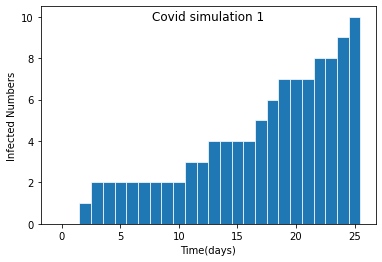

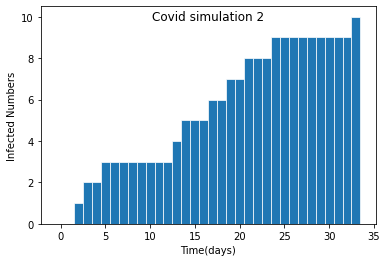

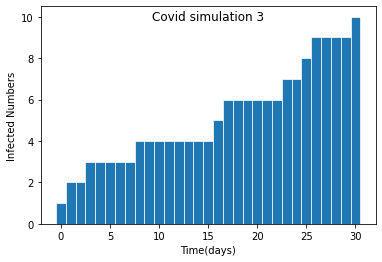

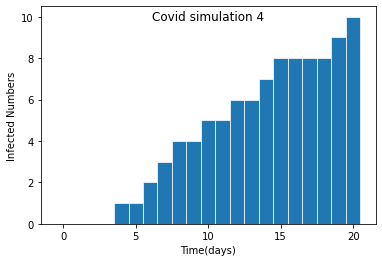

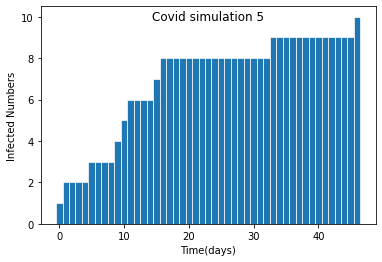

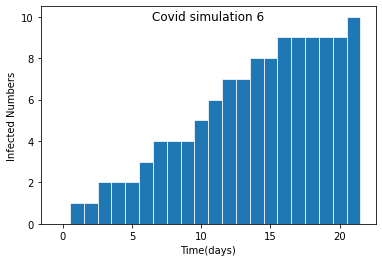

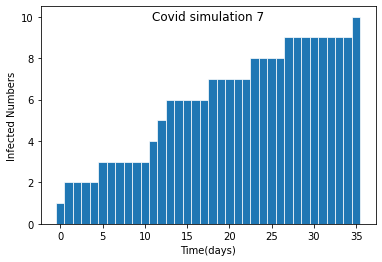

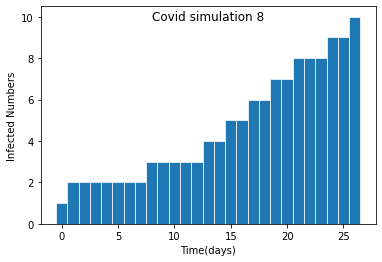

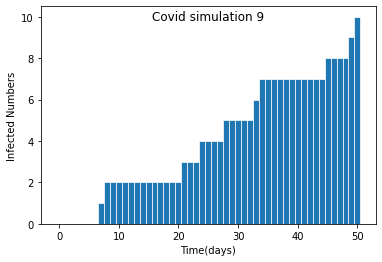

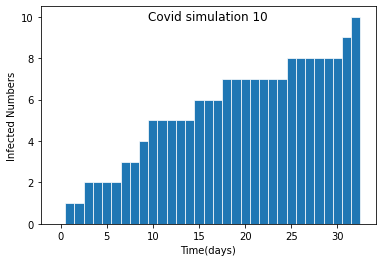

In [7]:
#Generate histogram for each simulation
from itertools import accumulate
accumulatedSample = [list(accumulate(samples[i])) for i in range(len(samples))]
# print(accumulatedSample)

def plotAllSimulations(sampleData):
    for i in range(len(sampleData)):
        fig, ax = plt.subplots()
        ax.set_title(f"Covid simulation {i+1}", y=1.0, pad=-14)
        ax.set_ylabel("Infected Numbers")
        ax.set_xlabel("Time(days)")
        ax.bar(range(len(sampleData[i])), sampleData[i], width=1, edgecolor="white", linewidth=0.7)
        
plotAllSimulations(accumulatedSample)

Summary(days per simulation): [26 34 31 21 47 22 36 27 51 33]
Mean: 32.8


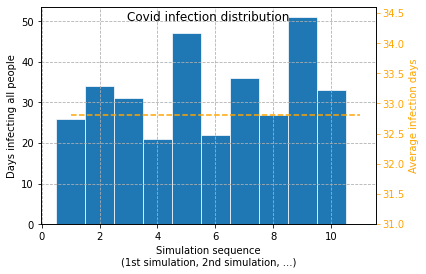

In [11]:
#put all simulation results and average infection days in one histogram
simulationResults = np.array([len(sample) for sample in accumulatedSample])
mean = np.mean(simulationResults)
print("Summary(days per simulation):", simulationResults)
print("Mean:", mean)

def plotSimulationSummary(sample, mean):
    #plot all simulation results in histogram
    fig, ax_hist = plt.subplots()
    ax_hist.set_title("Covid infection distribution", y=1.0, pad=-14)
    ax_hist.set_ylabel("Days infecting all people")
    ax_hist.set_xlabel("Simulation sequence\n(1st simulation, 2nd simulation, ...)")
    ax_hist.grid(linestyle='dashed')
    ax_hist.bar(range(1, len(sample)+1), sample, width=1, edgecolor="white", linewidth=0.7)
    
    #plot average in line diagram
    meanY = [mean] * (len(sample)+1)
    ax_line = ax_hist.twinx()
    ax_line.set_ylabel("Average infection days", color="orange")
    ax_line.tick_params(colors="orange")
    ax_line.plot(range(1,len(meanY)+1), meanY, label='linear', color="orange", linestyle='dashed')

plotSimulationSummary(simulationResults, mean)